In [1]:
import numpy as np
import pandas as pd
import pickle
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('model\lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

with open('model/id2word.pkl', 'rb') as f:
   id2word = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
doc_topic_dist = np.array(list_topic)
df = pd.DataFrame(list_topic)
df

,0,1,2,3,4,5
0,0.035494,0.026652,0.602592,0.059402,0.216486,0.059373
1,0.278622,0.067144,0.540052,0.017607,0.072253,0.024322
2,0.111220,0.010002,0.023806,0.203242,0.640339,0.011392
3,0.800639,0.029094,0.077192,0.039709,0.026180,0.027186
4,0.033127,0.236562,0.019031,0.061575,0.560622,0.089084
...,...,...,...,...,...,...
6526,0.051822,0.050537,0.048493,0.178873,0.624873,0.045403
6527,0.060200,0.107875,0.053167,0.312189,0.411099,0.055471
6528,0.035010,0.042009,0.030580,0.432117,0.421827,0.038457
6529,0.096552,0.095839,0.095855,0.505646,0.109766,0.096342


In [3]:
topic_corr = np.corrcoef(list_topic, rowvar=False)
topic_corr

array([[ 1.        , -0.33749527, -0.03992881, -0.17662171, -0.3771355 ,
        -0.2065795 ],
       [-0.33749527,  1.        , -0.14726582, -0.02187331, -0.44984629,
        -0.17534838],
       [-0.03992881, -0.14726582,  1.        , -0.14462529, -0.35653624,
        -0.12339545],
       [-0.17662171, -0.02187331, -0.14462529,  1.        , -0.11586161,
        -0.05389124],
       [-0.3771355 , -0.44984629, -0.35653624, -0.11586161,  1.        ,
         0.03120157],
       [-0.2065795 , -0.17534838, -0.12339545, -0.05389124,  0.03120157,
         1.        ]])

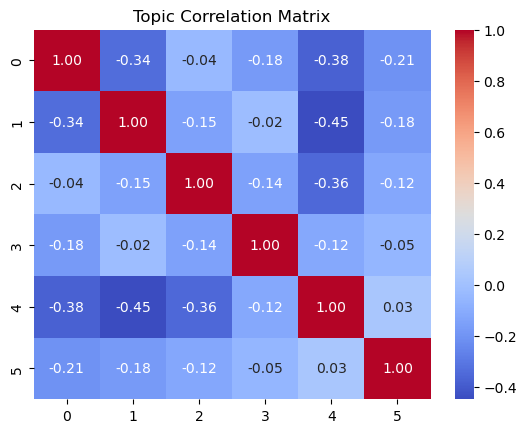

In [4]:
num_topics = 6
sns.heatmap(topic_corr, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=range(num_topics), yticklabels=range(num_topics))
plt.title('Topic Correlation Matrix')
plt.show()

In [16]:
# fig, ax = plt.subplots()
# heatmap = ax.pcolor(doc_topic_dist, cmap='Blues')

# cbar = plt.colorbar(heatmap)

# # Set the x-axis and y-axis labels
# ax.set_xlabel('Topic')
# ax.set_ylabel('Document')

# # Set the x-axis and y-axis tick labels
# topics = range(doc_topic_dist.shape[1])
# documents = range(doc_topic_dist.shape[0])
# ax.set_xticks(np.arange(len(topics))+0.5, minor=False)
# ax.set_yticks(np.arange(len(documents))+0.5, minor=False)
# ax.set_xticklabels(topics, minor=False)
# ax.set_yticklabels(documents, minor=False)
# plt.xticks(rotation=90)
# plt.show()

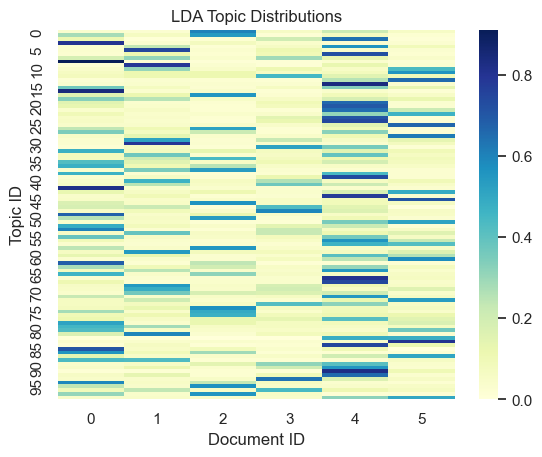

In [6]:
# Create heatmap
sub_list_topic = list_topic[:99]
sns.set(style="white")
sns.heatmap(sub_list_topic, cmap="YlGnBu")

# Set title and axis labels
plt.title("LDA Topic Distributions")
plt.xlabel("Document ID")
plt.ylabel("Topic ID")

# Show the plot
plt.show()

In [5]:
# Create heatmap
with open('model/topic_dict.pkl', 'rb') as f:
    topic_dict = pickle.load(f)
sub_list_topic = {topic_dict[topic]: prob for topic, prob in list_topic}
sns.set(style="white")
sns.heatmap(sub_list_topic, cmap="RdYlGn")

# Set title and axis labels
plt.title("LDA Topic Distributions")
plt.xlabel("Document ID")
plt.ylabel("Topic ID")

# Show the plot
plt.show()

ValueError: too many values to unpack (expected 2)